# *E. coli* Live Simulation Notebook

## Setup Simulation

In [178]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.get('livereveal')
# cm.update('livereveal', {
#               'width': 2048,
#               'height': 1448,
# })

{u'height': 1448, u'width': 2048}

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
import datetime

WC_ECOLI_DIRECTORY = os.path.expanduser("~/wcEcoli")
OUT_DIRECTORY = os.path.join(WC_ECOLI_DIRECTORY, "out")

now = datetime.datetime.now()
SUBMISSION_TIME = "%04d%02d%02d.%02d%02d%02d.%06d" % (
	now.year, now.month, now.day,
	now.hour, now.minute, now.second,
	now.microsecond)

JUPYTER_OUT_DIR = "jupyter"
KB_DIRECTORY = os.path.join(OUT_DIRECTORY, JUPYTER_OUT_DIR, "kb")
METADATA_DIRECTORY = os.path.join(OUT_DIRECTORY, JUPYTER_OUT_DIR, "metadata")
CELL_DIRECTORY = os.path.join(OUT_DIRECTORY, JUPYTER_OUT_DIR, "wildtype_000000", "000000", "generation_000000", "000000")
SIM_DATA_PATH = os.path.join(KB_DIRECTORY, "simData_Fit_1.cPickle")
SIM_OUT_PATH = os.path.join(CELL_DIRECTORY, "simOut")
PLOT_OUT_PATH = os.path.join(CELL_DIRECTORY, "plotOut")

if not os.path.exists(KB_DIRECTORY):
    os.makedirs(KB_DIRECTORY)

if not os.path.exists(METADATA_DIRECTORY):
    os.makedirs(METADATA_DIRECTORY)
    
if not os.path.exists(CELL_DIRECTORY):
    os.makedirs(CELL_DIRECTORY)
    
if not os.path.exists(SIM_OUT_PATH):
    os.makedirs(SIM_OUT_PATH)
    
if not os.path.exists(PLOT_OUT_PATH):
    os.makedirs(PLOT_OUT_PATH)

sys.path.append(WC_ECOLI_DIRECTORY)

Load and fit the data.

In [2]:
import cPickle
from reconstruction.ecoli.knowledge_base_raw import KnowledgeBaseEcoli
from reconstruction.ecoli.fit_sim_data_1 import fitSimData_1
from reconstruction.ecoli.fit_sim_data_2 import fitSimData_2
from models.ecoli.sim.livesim import EcoliLiveSimulation

raw_data = KnowledgeBaseEcoli()
sim_data = fitSimData_1(raw_data)

# with open(SIM_DATA_PATH, 'wb') as f:
#     cPickle.dump(sim_data, f, cPickle.HIGHEST_PROTOCOL)

In [3]:
options = {}

options["simDataLocation"] = SIM_DATA_PATH
options["outputDir"] = os.path.join(CELL_DIRECTORY, "simOut")
options["logToDisk"] = True
options["overwriteExistingFiles"] = False

sim = EcoliLiveSimulation(**options)

# Run

Startup the sim:

In [4]:
sim.startup()

Time (s)  Dry mass     Dry mass      Protein          RNA     Expected
              (fg)  fold change  fold change  fold change  fold change
========  ========  ===========  ===========  ===========  ===========
       0    245.46        1.000        1.000        1.000        1.000


Step through the simulation

In [5]:
sim.step(steps=10)
sim.knockout('GENE')
sim.step()

       0    245.50        1.000        1.000        1.000        1.000
       0    245.53        1.000        1.000        1.000        1.000
       0    245.63        1.001        1.000        1.000        1.000
       0    245.65        1.001        1.000        1.000        1.000
       1    246.05        1.002        1.000        1.000        1.000
       1    246.12        1.003        1.000        1.000        1.000
       2    246.20        1.003        1.001        1.000        1.001
       3    246.26        1.003        1.001        1.000        1.001
       4    246.31        1.003        1.001        1.000        1.001
       5    246.37        1.004        1.001        1.000        1.001


# Analyse / Interact

Run a pre-built analysis plot on the current data

In [6]:
%run -i helpers/ecoli_analysis.py

In [7]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 6

In [10]:
sim.step(steps=10)

       5    246.42        1.004        1.001        1.000        1.001
       6    246.54        1.004        1.001        1.000        1.001
       7    246.63        1.005        1.002        1.000        1.001
       8    246.71        1.005        1.002        1.000        1.002
       9    246.78        1.005        1.002        1.000        1.002
      10    246.87        1.006        1.002        1.000        1.002
      11    246.93        1.006        1.002        1.000        1.002
      11    247.00        1.006        1.003        1.000        1.002
      12    247.09        1.007        1.003        1.000        1.002
      13    247.17        1.007        1.003        1.000        1.003


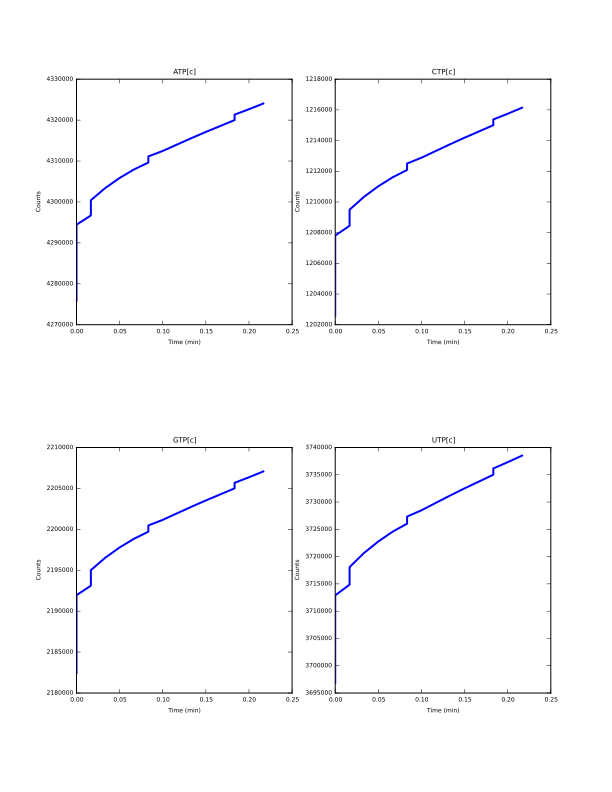

In [11]:
analysis.ntpCounts()

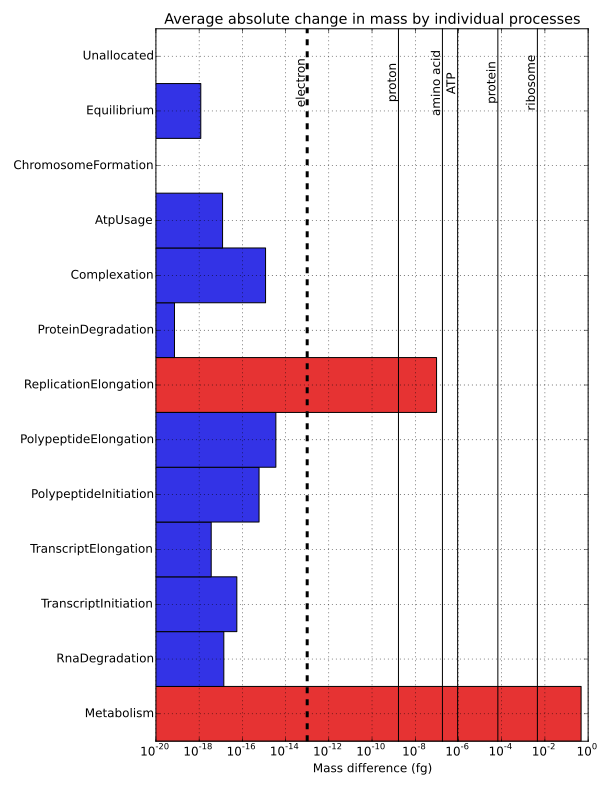

In [39]:
analysis.processMassBalance()

In [12]:
sim.step(steps=-1, time=5)

      14    247.27        1.007        1.003        1.000        1.003
      15    247.34        1.008        1.003        1.000        1.003
      16    247.41        1.008        1.003        1.000        1.003
      17    247.49        1.008        1.004        1.000        1.003
      18    247.57        1.009        1.004        1.000        1.003
      18    247.66        1.009        1.004        1.000        1.004


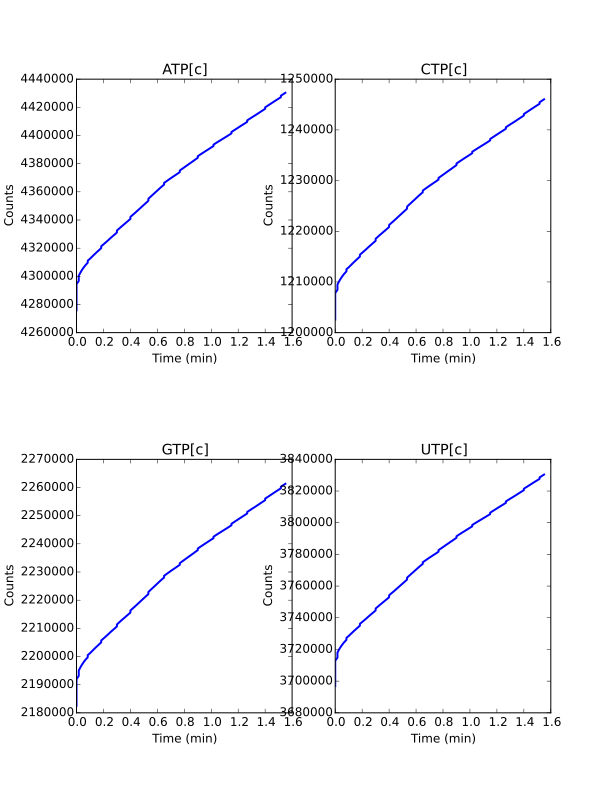

In [42]:
analysis.ntpCounts()

## Modify a sim parameter

In [101]:
sim_data.envDict.keys()

['000000_wildtype', '000003_aa', '000002_add_aa', '000001_cut_glucose']

In [100]:
sim.processes['Metabolism'].metabolism

AttributeError: 'Metabolism' object has no attribute 'metabolism'

In [ ]:
sim.

## We can use the reader here, too

In [49]:
from models.ecoli.analysis.readers.reader import Reader
r = Reader(SIM_DATA_PATH, SIM_OUT_PATH)

In [55]:
r.fbaResults.externalExchangeFluxes['PROTON[p]'][:5]

1970-01-01 00:00:00.000    0
1970-01-01 00:00:00.200   -0
1970-01-01 00:00:00.400   -0
1970-01-01 00:00:00.600   -0
1970-01-01 00:00:00.800   -0
Name: PROTON[p], dtype: float64

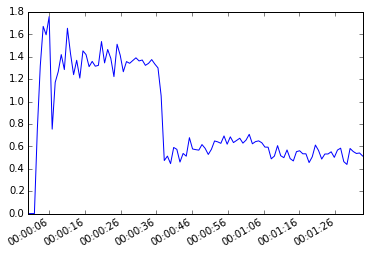

In [58]:
r.fbaResults.externalExchangeFluxes['PROTON[p]'].plot()

We can step the sim and then look again

     103    253.82        1.034        1.021        1.015        1.020
     104    253.89        1.034        1.021        1.015        1.020
     105    253.95        1.035        1.022        1.015        1.020
     106    254.01        1.035        1.022        1.016        1.021
     106    254.07        1.035        1.022        1.016        1.021
     107    254.13        1.035        1.022        1.016        1.021
     108    254.18        1.036        1.022        1.016        1.021
     109    254.24        1.036        1.022        1.016        1.021
     110    254.30        1.036        1.023        1.016        1.022
     111    254.36        1.036        1.023        1.017        1.022


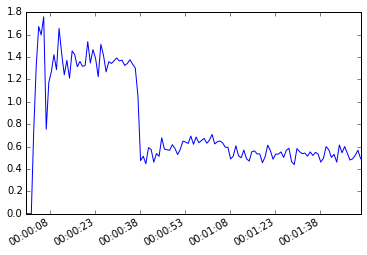

In [65]:
sim.step(steps=10)
r.reload(load="FBA")
r.fbaResults.externalExchangeFluxes['PROTON[p]'].plot()

Deeper exploration: what has the most flux in the network?

In [164]:
top = r.fbaResults.reactionFluxes.abs().sum().sort_values(ascending=False)[:10]
top

TRANS-RXN-145 (reverse)                                                      2139.005402
ATPSYN-RXN[CCO-PM-BAC-NEG]-ATP/PROTON/WATER//ADP/Pi/PROTON.48. (reverse)      793.244972
NUCLEOSIDE-DIP-KIN-RXN-GDP/ATP//GTP/ADP.17.                                   539.334017
SUCCINATE-DEHYDROGENASE-UBIQUINONE-RXN-SUC/UBIQUINONE-8//FUM/CPD-9956.31.     445.926300
R601-RXN-FUM/REDUCED-MENAQUINONE//SUC/CPD-9728.38.                            380.858653
RXN0-5388-NADH/CPD-9728/PROTON//NAD/REDUCED-MENAQUINONE/PROTON.53.            380.832692
TRANS-RXN0-545 (reverse)                                                      226.353143
TRANS-RXN0-474                                                                224.765243
RXN0-5268-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59.      224.741431
PHOSGLYPHOS-RXN                                                               200.609059
dtype: float64

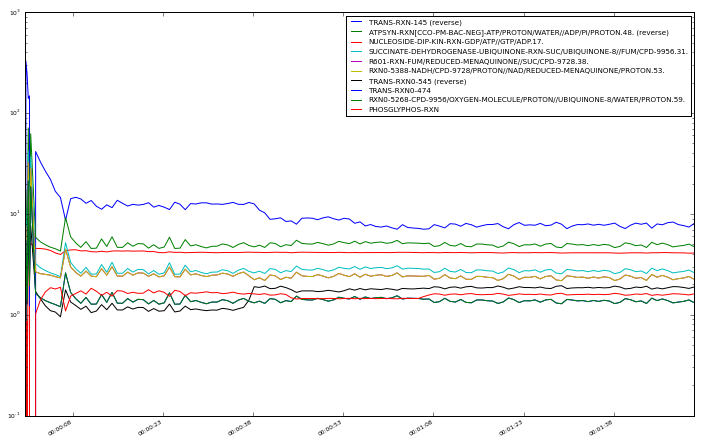

In [166]:
r.fbaResults.reactionFluxes[top.index].plot(logy=True)

In [13]:
showReactionPathway('TRANS-RXN-145')

No pathway found for TRANS-RXN-145
Reaction: http://ecocyc.org/ECOLI/NEW-IMAGE?type=NIL&object=TRANS-RXN-145&redirect=T


## Instrument the model

In [119]:
import wholecell.loggers.logger
import matplotlib.pyplot as plt

class IPythonLogger(wholecell.loggers.logger.Logger):
    _fig, _ax, _im = None, None, None
    
    _time = []
    _data = []
    
    def __init__(self, figure, axes):
        self._fig, self._ax = figure, axes
    
    def initialize(self, sim):
        pass
    
    def finalize(self, sim):
        pass
    
    def append(self, sim):
        fig, ax = self._fig, self._ax
        
        self._time.append(sim.time())
        self._data.append(sim.listeners['FBAResults'].externalExchangeFluxes.reshape(8,9))
        
        if self._im:
            self._im.set_data(self._data[-1])
#             for i in range(self._data[0].shape[0]):
#                 ax.lines[i].set_xdata(self._time)
#                 ax.lines[i].set_ydata([x[i] for x in self._data])
        else:
#             ax.plot(self._time, self._data, label=sim.listeners['FBAResults'].externalMoleculeIDs)
#             a1.pcolor(self._data[0].reshape(8,9), cmap=plt.cm.Blues, vmin=max(-1., data.min()), vmax=data.max())
            self._im = ax.imshow(self._data[0], interpolation='nearest', aspect='auto', cmap='RdBu')
            fig.colorbar(self._im)


            
#         ax.relim()
#         ax.autoscale_view(True,True,True)
        fig.canvas.draw()

<IPython.core.display.Javascript object>


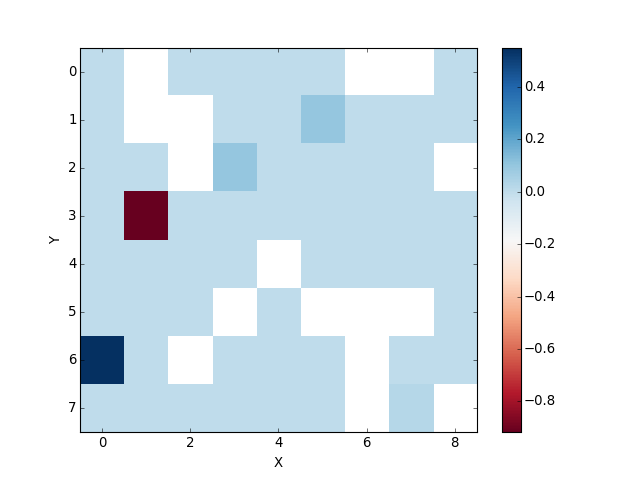

In [120]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

iplogger = IPythonLogger(fig, ax)
sim.loggers['IPython'] = iplogger

In [118]:
fig.colorbar(sim.loggers['IPython']._im)
fig.canvas.draw()

<IPython.core.display.Javascript object>


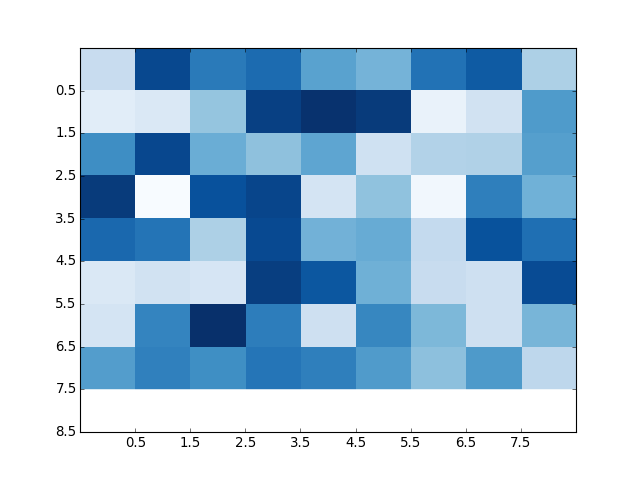

-inf 0.499181726554
[[ 0.24854428  0.90526281  0.71384335  0.77295118  0.55465185  0.4804881
   0.74535763  0.83523442  0.33222989]
 [ 0.11523861  0.15438877  0.40350989  0.93471113  0.98778384  0.95507313
   0.07650642  0.19760268  0.58900094]
 [ 0.64224498  0.90863229  0.50609299  0.41905357  0.54073463  0.21127733
   0.31686098  0.32562023  0.56689379]
 [ 0.95240461  0.01082543  0.87076186  0.91480966  0.18412442  0.41504803
   0.03887495  0.69452446  0.4898543 ]
 [ 0.78526038  0.73709487  0.33209212  0.90065439  0.48692872  0.5129769
   0.26209224  0.86766216  0.75879685]
 [ 0.15189711  0.20069889  0.17583991  0.9427324   0.84792129  0.49472145
   0.24393412  0.21886756  0.89036098]
 [ 0.18415109  0.67757399  0.99793949  0.70352261  0.21318627  0.66723034
   0.45967482  0.21316179  0.4717382 ]
 [ 0.57700468  0.69328918  0.63703708  0.73454748  0.69643507  0.58510043
   0.42306309  0.59142117  0.28113133]]


In [76]:
import numpy as np

fig, a1 = plt.subplots()
data = sim.listeners['FBAResults'].externalExchangeFluxes.reshape(8,9)
data2 = np.random.random((8,9))

print data.min(), data.max()
print data2
im = a1.imshow(data2, interpolation='nearest', aspect='auto', cmap='Blues')
# a1.pcolor(data2, vmin=0, vmax=1)
a1.set_xticks(np.arange(8)+0.5, minor=False)
a1.set_yticks(np.arange(9)+0.5, minor=False)
plt.show()

In [ ]:
fig.legend()

In [6]:
sim.startup()

Time (s)  Dry mass     Dry mass      Protein          RNA     Expected
              (fg)  fold change  fold change  fold change  fold change
========  ========  ===========  ===========  ===========  ===========
       0    245.46        1.000        1.000        1.000        1.000


In [7]:
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sim.step(steps=10)

       0    245.50        1.000        1.000        1.000        1.000
       0    245.53        1.000        1.000        1.000        1.000
       0    245.63        1.001        1.000        1.000        1.000
       0    245.65        1.001        1.000        1.000        1.000
       1    246.05        1.002        1.000        1.000        1.000
       1    246.12        1.003        1.000        1.000        1.000
       2    246.20        1.003        1.001        1.000        1.001
       3    246.26        1.003        1.001        1.000        1.001
       4    246.31        1.003        1.001        1.000        1.001
       5    246.37        1.004        1.001        1.000        1.001


In [13]:
sim.processes['Metabolism'].fba.externalMoleculeLevelsIs()

TypeError: externalMoleculeLevelsIs() takes exactly 2 arguments (1 given)

In [11]:
# sim.step()
sim.processes['Metabolism'].fba.externalExchangeFluxes().shape

(72,)

<IPython.core.display.Javascript object>


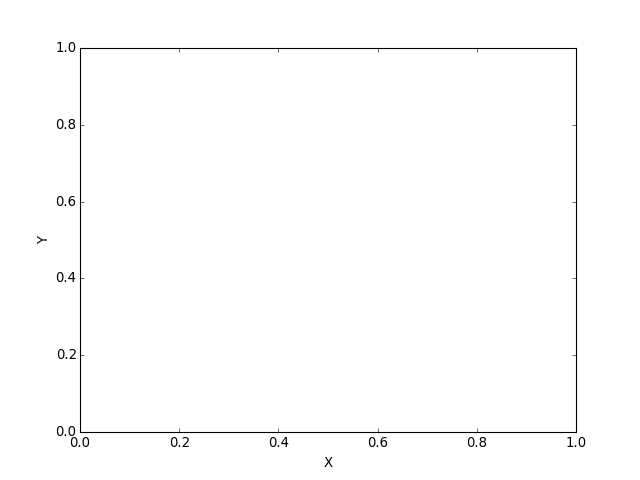

KeyError: 'IPython'

In [8]:
%matplotlib notebook

fig, ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

time = sim.loggers['IPython']._time
data = sim.loggers['IPython']._data
labels = sim.listeners['FBAResults'].externalMoleculeIDs

ax.plot(time, data)

fig.show()

In [109]:
sim.shutdown()


Simulation finished:
 - Length: 0:00:21
 - Runtime: 0:00:37

